In [2]:
import torch
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'


0: Aluminium foil
1: Bottle cap
2: Bottle
3: Broken glass
4: Can
5: Carton
6: Cigarette
7: Cup
8: Lid
9: Other litter
10: Other plastic
11: Paper
12: Plastic bag - wrapper
13: Plastic container
14: Pop tab
15: Straw
16: Styrofoam piece
17: Unlabeled litter
Bottle cap: 1 0.8810096153846154 0.16466346153846154 0.11538461538461539 0.21875
Bottle: 2 0.9278846153846154 0.25240384615384615 0.019230769230769232 0.038461538461538464
Unlabeled litter: 17 0.9002403846153846 0.07572115384615384 0.05048076923076923 0.07211538461538461
Unlabeled litter: 17 0.7307692307692307 0.46274038461538464 0.10576923076923077 0.1346153846153846
Unlabeled litter: 17 0.7620192307692307 0.46153846153846156 0.04807692307692308 0.10096153846153846
Other litter: 9 0.4098557692307692 0.515625 0.0673076923076923 0.11298076923076923
Unlabeled litter: 17 0.38100961538461536 0.5084134615384616 0.019230769230769232 0.057692307692307696
Bottle cap: 1 0.33533653846153844 0.2692307692307692 0.04326923076923077 0.076923076923

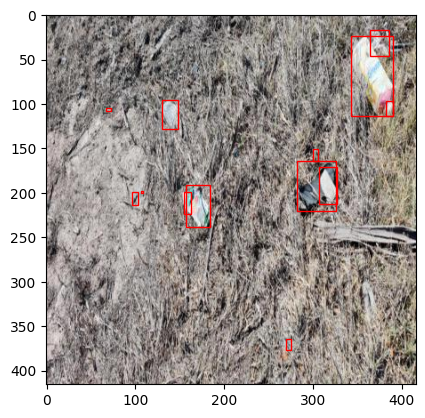

Plastic bag - wrapper: 12 0.5084134615384616 0.5036057692307693 0.7896634615384616 0.7391826923076923


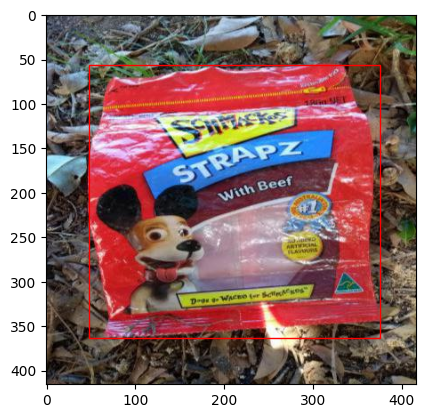

Bottle cap: 1 0.42788461538461536 0.4891826923076923 0.038461538461538464 0.09375
Bottle: 2 0.4182692307692308 0.5276442307692307 0.018028846153846152 0.016826923076923076
Plastic bag - wrapper: 12 0.9459134615384616 0.8870192307692307 0.03485576923076923 0.026442307692307692
Cigarette: 6 0.8617788461538461 0.9014423076923077 0.007211538461538462 0.018028846153846152
Unlabeled litter: 17 0.9447115384615384 0.8100961538461539 0.016826923076923076 0.06370192307692307
Other plastic: 10 0.6971153846153846 0.6298076923076923 0.03365384615384615 0.07692307692307693


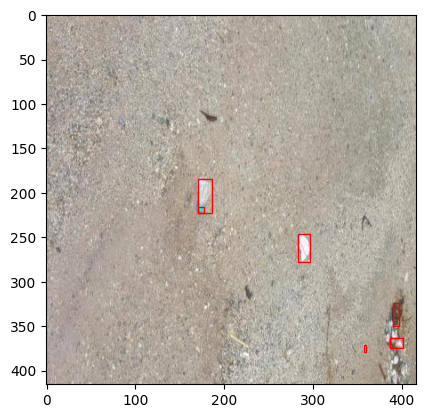

In [4]:
classes = ['Aluminium foil', 'Bottle cap', 'Bottle', 'Broken glass', 'Can', 'Carton', 'Cigarette', 'Cup', 'Lid', 'Other litter', 'Other plastic', 'Paper', 'Plastic bag - wrapper', 'Plastic container', 'Pop tab', 'Straw', 'Styrofoam piece', 'Unlabeled litter']
label_map = {index: value for index, value in enumerate(classes)}
for i in label_map:
    print(str(i)+": "+label_map[i])


class TACODataset(Dataset):
    def __init__(self, type, target_transform=None):
        self.dir = "./data/" + type
        self.img_names = pd.read_csv(self.dir + "/img_names.txt")
        self.img_dir = self.dir + "/images/"
        self.target_transform = target_transform
        self.classes = ['Aluminium foil', 'Bottle cap', 'Bottle', 'Broken glass', 'Can', 'Carton', 'Cigarette', 'Cup', 'Lid', 'Other litter', 'Other plastic', 'Paper', 'Plastic bag - wrapper', 'Plastic container', 'Pop tab', 'Straw', 'Styrofoam piece', 'Unlabeled litter']
        self.nclasses = 18

    def __len__(self):
        return len(self.img_names)

    def __getitem__(self, idx):
        img_path = self.img_dir + self.img_names.iloc[idx, 0] + ".jpg"
        image = read_image(img_path)
        label_file = open(self.dir + "/labels/" + self.img_names.iloc[idx, 0] + ".txt")
        label = label_file.read()

        if self.target_transform:
            label = self.target_transform(label)

        return image, label
    

def make_rect(label_info):
    coords = label_info.split()
    coords.pop(0)
    coords = [eval(i) for i in coords]
    coords = [i*416 for i in coords]
    rect = Rectangle((coords[0] - (coords[2]/2), coords[1] - (coords[3]/2)), coords[2], coords[3], linewidth=1, edgecolor='r', facecolor='none')
    return rect


def show_example(img, label):
    plt.imshow(img.permute(1, 2, 0))
    trash = label.split("\n")
    
    for t in trash:

        print(str(classes[int(t[0:2])]) + ": " + t)
        plt.gca().add_patch(make_rect(t))
    plt.show()

train_dataset = TACODataset("train")
validation_dataset = TACODataset("valid")
test_dataset = TACODataset("test")


show_example(*train_dataset[89])
show_example(*validation_dataset[40])
show_example(*test_dataset[0])

In [5]:
batch_size = 64

# # to accomodate for different image sizes in dataloaders
# def my_collate(batch):
#     # out_list = []
#     # for item in batch:
#     #     out_list.append([item[0], item[1]])

#     # return out_list

#     print(len(batch))
#     data = [item[0] for item in batch]
#     print(type(data[0]))
#     target = [item[1] for item in batch]
#     target = torch.LongTensor(target)
#     return [data, target]

# train_dl = DataLoader(training_set, batch_size, shuffle=True, collate_fn=my_collate)
# test_dl = DataLoader(testing_set, batch_size*2, collate_fn=my_collate)

# print(len(test_dl))
# print(test_dl)

train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size)
validation_dataloader = DataLoader(validation_dataset, batch_size, shuffle=True)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    # print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 3, 416, 416])
